In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 加载图像
img = cv2.imread('image_salt_pepper2.jpg')

In [3]:
kernel_size = [3,5,7,9,11]

In [4]:
def blur(img, kernel_size):
    # 获取图像的高度和宽度
    h, w = img.shape[:2]
    
    # 创建一个kernel_size大小的平均核
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    
    # 使用cv2.filter2D()函数对图像进行卷积操作
    dst = cv2.filter2D(img, -1, kernel)
    
    return dst

mean_filtered_img = blur(img, 5)

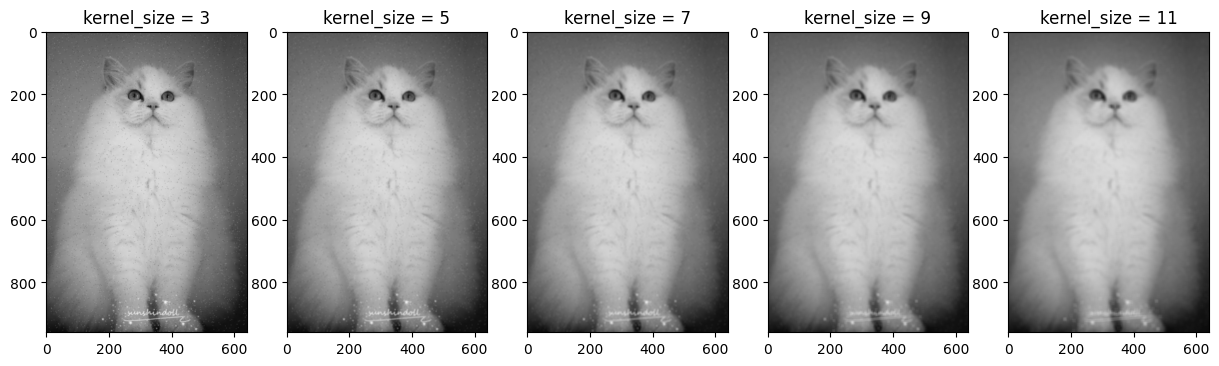

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(15, 10))

# Reshape axs to a 1D array
axs = axs.reshape(-1)

for idx, kernel_size in enumerate(kernel_size):
    mean_filtered_img = blur(img, kernel_size)
    axs[idx].imshow(mean_filtered_img, cmap='gray')
    axs[idx].set_title('kernel_size = {}'.format(kernel_size))

plt.show()

In [4]:
def median_blur(img, kernel_size):
    # 获取图像的高度和宽度
    h, w = img.shape[:2]
    
    # 计算padding的大小
    padding_size = kernel_size // 2
    
    # 将图像四周进行padding，避免卷积核越界
    img_padding = np.pad(img, ((padding_size, padding_size), (padding_size, padding_size), (0, 0)), mode='edge')
    
    # 创建一个空的输出图像
    dst = np.zeros((h, w, 3), np.uint8)
    
    # 对图像进行中值模糊操作
    for i in range(padding_size, h + padding_size):
        for j in range(padding_size, w + padding_size):
            # 提取卷积核对应的像素值
            kernel = img_padding[i - padding_size:i + padding_size + 1, j - padding_size:j + padding_size + 1]
            # 对像素值进行中值操作
            dst[i - padding_size, j - padding_size] = np.median(kernel, axis=(0, 1))
    
    return dst

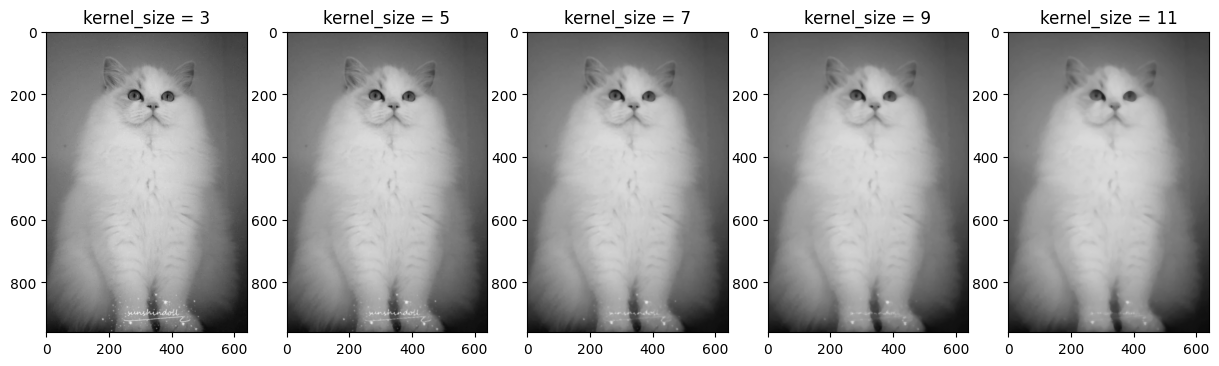

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(15, 10))

# Reshape axs to a 1D array
axs = axs.reshape(-1)

for idx, kernel_size in enumerate(kernel_size):
    median_filtered_img = median_blur(img, kernel_size)
    axs[idx].imshow(median_filtered_img, cmap='gray')
    axs[idx].set_title('kernel_size = {}'.format(kernel_size))

plt.show()

In [ ]:
median_filtered_img = median_blur(img, 5)

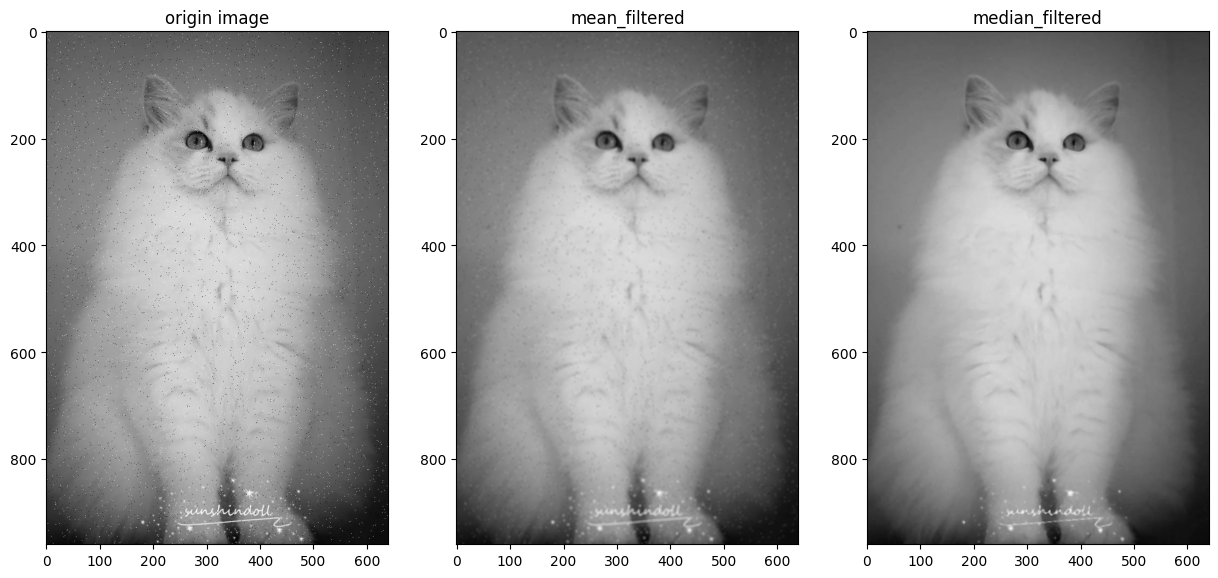

In [ ]:
# 显示滤波后的图像
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img)
axs[0].set_title('origin image')
axs[1].imshow(mean_filtered_img)
axs[1].set_title('mean_filtered')
axs[2].imshow(median_filtered_img)
axs[2].set_title('median_filtered')
plt.show()

#### 调库方法

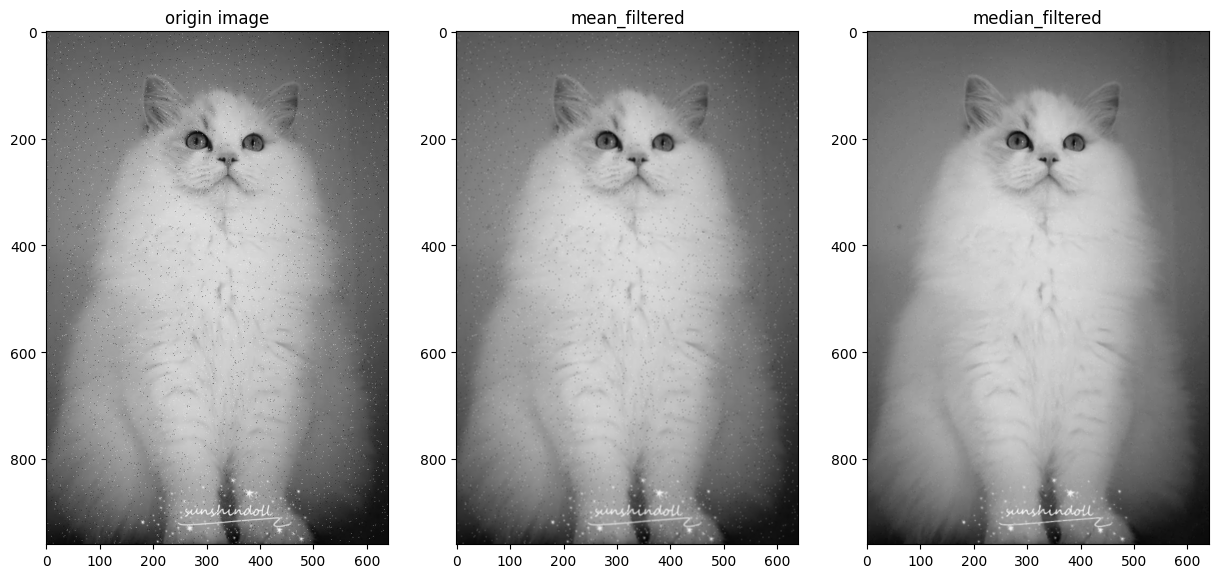

In [ ]:
# 均值滤波器
mean_filtered = cv2.blur(img, (3, 3))  # 卷积核大小为5x5

# 中值滤波器
median_filtered = cv2.medianBlur(img, 3)  # 卷积核大小为5x5

# 显示滤波后的图像
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img)
axs[0].set_title('origin image')
axs[1].imshow(mean_filtered)
axs[1].set_title('mean_filtered')
axs[2].imshow(median_filtered)
axs[2].set_title('median_filtered')
plt.show()

修改不同的卷积核